In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dfIdentity = pd.read_csv("../Dataset/ML/train_identity.csv")
dfIdentity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
dfTransactions = pd.read_csv("../Dataset/ML/train_transaction.csv", usecols = ["TransactionID", "isFraud"])
dfTransactions.head()

,TransactionID,isFraud
0,2987000,0
1,2987001,0
2,2987002,0
3,2987003,0
4,2987004,0


In [4]:
dfMerge = dfIdentity.merge(dfTransactions, on = "TransactionID", how = "left")
dfMerge.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,0
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,F,F,T,T,desktop,Windows,0
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,F,F,T,T,desktop,NaN,0
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS,0


In [60]:
dfIdentity["id_31"].value_counts()[dfIdentity["id_31"].value_counts() > 100]

chrome 63.0                   22000
mobile safari 11.0            13423
mobile safari generic         11474
ie 11.0 for desktop            9030
safari generic                 8195
chrome 62.0                    7182
chrome 65.0                    6871
chrome 64.0                    6711
chrome 63.0 for android        5806
chrome generic                 4778
chrome 66.0                    4264
edge 16.0                      4188
chrome 64.0 for android        3473
chrome 65.0 for android        3336
firefox 57.0                   3315
mobile safari 10.0             2779
chrome 66.0 for android        2349
chrome 62.0 for android        2097
edge 15.0                      1600
chrome generic for android     1158
firefox 59.0                   1099
samsung browser 6.2            1061
firefox 58.0                    833
chrome 49.0                     719
firefox                         673
ie 11.0 for tablet              647
chrome 61.0                     642
safari 11.0                 

In [49]:
for a in filter(lambda x: "ie" in x, list(dfMerge["id_31"].value_counts().reset_index()["index"])):
    print(a)

ie 11.0 for desktop
ie 11.0 for tablet
android webview 4.0
mobile safari uiwebview
ie


In [89]:
browsers = ["chrome", "safari", "samsung", "firefox", "ie 11.0", "edge", "opera", "android"]
def parse_id31(x):
    for browser in browsers:
        if browser in str(x):
            return browser
        
    if pd.isna(x):
        return "NA"
    return "Other"

dfMerge["id_31b"] = dfMerge["id_31"].apply(lambda x: parse_id31(x))
# dfMerge[["id_31", "DeviceType", "id_31b", "isFraud"]].head()
dfMerge["id_31b"].value_counts()

chrome     76059
safari     37281
ie 11.0     9677
firefox     7012
edge        6401
NA          3951
samsung     2044
Other        973
opera        449
android      386
Name: id_31b, dtype: int64

In [97]:
gb = dfMerge.groupby("id_31b").agg({"isFraud": ["sum", "count"]}).reset_index()
gb.columns = ["id_31b", "sum", "count"]
gb["Porcentaje"] = gb["sum"] / gb["count"]
gb

,id_31b,sum,count,Porcentaje
0,NA,147,3951,0.037206
1,Other,136,973,0.139774
2,android,84,386,0.217617
3,chrome,7298,76059,0.095952
4,edge,225,6401,0.035151
5,firefox,548,7012,0.078152
6,ie 11.0,176,9677,0.018187
7,opera,142,449,0.316258
8,safari,2384,37281,0.063947
9,samsung,178,2044,0.087084


[Text(0.5, 1.0, 'Porcentaje de fraude en los navegadores más utilzados'),
 Text(0.5, 0, 'Navegador')]

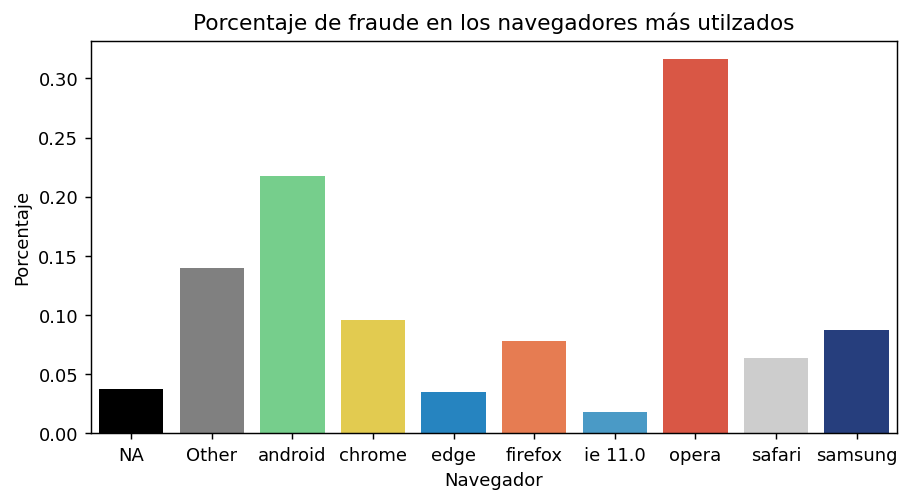

In [142]:
plt.subplots(dpi = 130, figsize = (8,4))
ax = sns.barplot(data = gb, x = "id_31b", y = "Porcentaje", palette = ["black", "gray", "#67dd84", "#fadb38", "#0c8ada", "#FF7139", "#35a0db", "#f2452c", "#cdcdcd", "#18378b"])
ax.set(title = "Porcentaje de fraude en los navegadores más utilzados", xlabel = "Navegador")

In [149]:
gb = dfMerge.groupby(["DeviceType", "isFraud"]).count().reset_index()
gb

,DeviceType,isFraud,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceInfo,id_31b
0,desktop,0,79611,79611,79611,43652,43652,76936,76936,2422,...,79203,49782,46589,49941,79611,79611,79611,79611,69365,79611
1,desktop,1,5554,5554,5554,3976,3976,5432,5432,127,...,5513,1665,1614,1693,5554,5554,5554,5554,4085,5554
2,mobile,0,49988,49988,49988,15552,15552,48902,48902,2307,...,49864,24353,23337,24267,49988,49988,49988,49988,40650,49988
3,mobile,1,5657,5657,5657,3130,3130,5544,5544,299,...,5652,1786,1749,1787,5657,5657,5657,5657,4521,5657


[Text(0.5, 1.0, 'Cantidad de transacciones\npor tipo de dispositivo'),
 Text(0, 0.5, 'Cantidad de transacciones'),
 Text(0.5, 0, 'Tipo de dispositivo')]

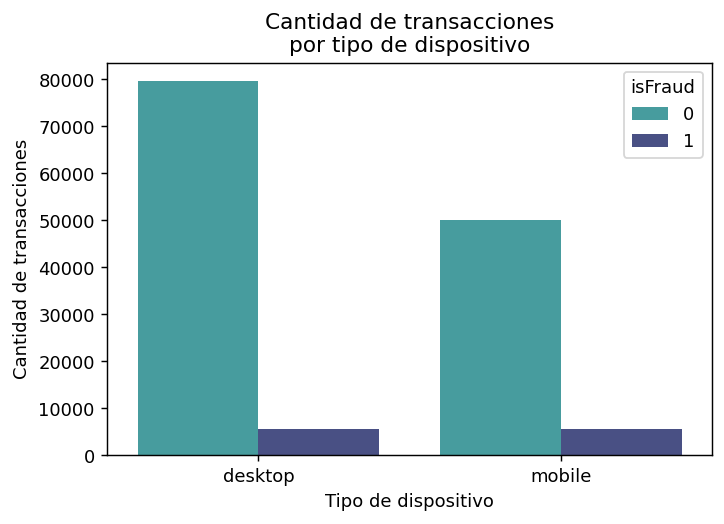

In [168]:
plt.subplots(dpi = 130)
ax = sns.barplot(data = gb, x = "DeviceType", y = "TransactionID", hue = "isFraud", palette = "mako_r")
ax.set(title = "Cantidad de transacciones\npor tipo de dispositivo", ylabel = "Cantidad de transacciones", xlabel = "Tipo de dispositivo")